In [1]:
import warnings
import time
import os
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.integrate import ode, odeint, solve_ivp
warnings.filterwarnings('ignore')  
plt.rcParams['text.usetex'] = True

In [2]:
def customize_axes(ax, x_p=0, y_p=0, x_p_direction='bottom', y_p_direction='left'):
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position(x_p_direction)
    ax.spines['bottom'].set_position(('data', y_p))
    ax.yaxis.set_ticks_position(y_p_direction)
    ax.spines['left'].set_position(('data', x_p))
    ax.plot(1, 1*x_p, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(1*y_p, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

<span style="color:red">**EXAMPLE 7.3.1** :                                                                                                                                            
<span style="color:red">Consider the system                                                                                                                     
$\qquad\qquad\begin{aligned} \dot r &= r(1-r^2) + \mu r \cos\theta, \\ \dot\theta &= 1 . \end{aligned} \tag{1}$                                                                                                                    
When $\mu = 0$, there is a stable limit cycle at $r=1$, as discussed in Example 7.1.1.                                                                        
Show that a closed orbit still exists for $\mu \neq 0$, as long as $\mu$ is sufficiently small.<span>


#### Solution

We seek two concentric circles with radii $r_{\min}$ and $r_{\max}$, such that
$\dot r > 0$ on the inner circle and $\dot r < 0$ on the outer circle.                                                                                              
Then the annulus $ 0 < r_{\min} \le r \le r_{\max}$ will be our desired trapping region.                                                                                                                            
Note that there are no fixed points in the annulus since $\dot\theta \neq 0$;                                                                                            
hence if $r_{\min}$ and $r_{\max}$ can be found, the Poincaré–Bendixson Theorem will imply the existence of a closed orbit.

To find $r_{\min}$, we require

$\qquad\qquad\dot r = r(1-r^2) + \mu r \cos\theta > 0 \quad \text{for all } \theta .$

Since $\cos\theta \ge -1$, a sufficient condition for $r_{\min}$ is

$\qquad\qquad 1 - r^2 - \mu > 0.$

Hence any $r_{\min} < \sqrt{\,1-\mu\,}$ will work, as long as $\mu < 1$ so that the square root makes sense.                                                   
We should choose $r_{\min}$ as large as possible, to hem in the limit cycle as tightly as we can.                                                                
For instance, we could pick

$\qquad\qquad r_{\min} = 0.999\sqrt{\,1-\mu\,}.$

Even $r_{\min} = \sqrt{\,1-\mu\,}$ works, but more careful reasoning is required.

By a similar argument, the flow is inward on the outer circle if

$\qquad\qquad r_{\max} = 1.001\sqrt{\,1+\mu\,}.$

Therefore a closed orbit exists for all $\mu < 1$, and it lies somewhere in the annulus

$\qquad\qquad 0.999\sqrt{\,1-\mu\,} \;\le\; r \;\le\; 1.001\sqrt{\,1+\mu\,}.$

<span style="color:red">**7.3.8** Recall the system                                                                                                                                                 
$\qquad\qquad\begin{aligned}\dot{r} &= r(1 - r^2) + \mu r \cos \theta \\
\dot{\theta}&=1 \end{aligned} \qquad\qquad$ of *Example **7.3.1***                                                                                                                                 
Using the computer, plot the phase portrait for various values of $\mu > 0$.                                                                                      
Is there a critical value $\mu_c$ at which the closed orbit ceases to exist ?                                                                                           
If so, estimate it. If not, prove that a closed orbit exists for all $\mu > 0$.<span>

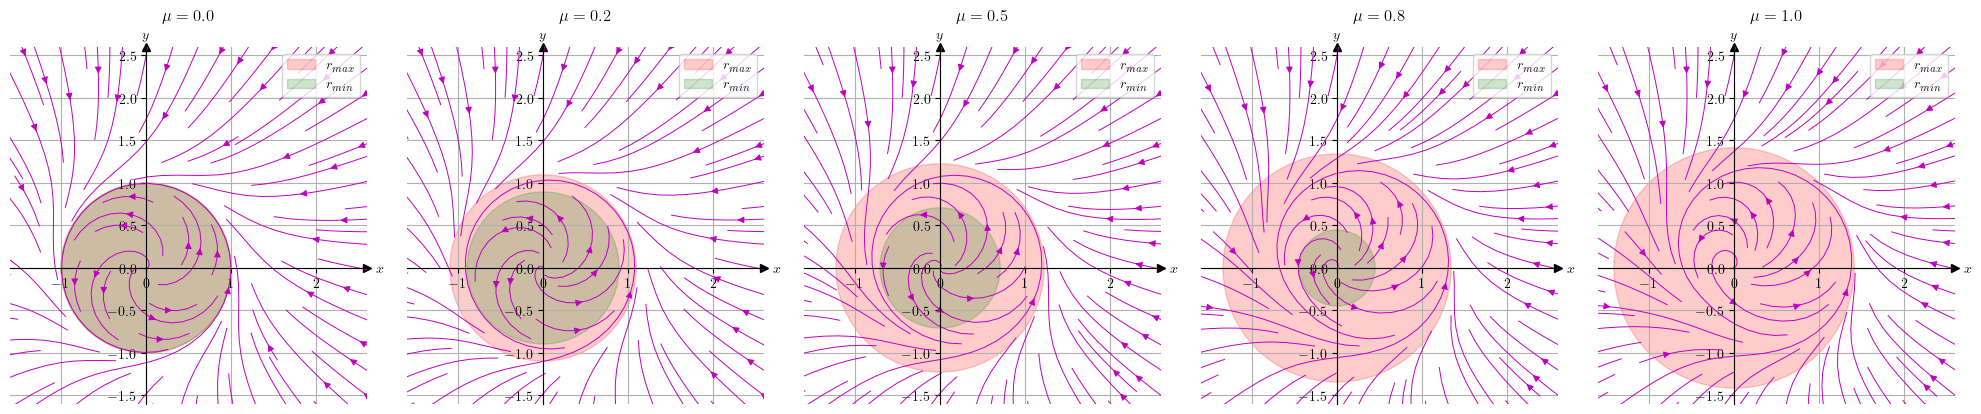

In [3]:
def plot_phase_portrait(ax, mu):
    def r_dot(r, theta):
        return r * (1 - r**2) + mu * r * np.cos(theta)
    
    r_min = np.sqrt(max(0, 1 - mu))
    r_max = np.sqrt(1 + mu)

    x = np.linspace(-3, 3, 400)
    y = np.linspace(-3, 3, 400)
    X, Y = np.meshgrid(x, y)
    
    R = np.sqrt(X**2 + Y**2)
    Theta = np.arctan2(Y, X)
    R_nonzero = np.where(R == 0, 1, R)
    
    R_dot_vals = r_dot(R, Theta)
    U = (R_dot_vals * (X / R_nonzero)) - Y
    V = (R_dot_vals * (Y / R_nonzero)) + X
    
    mask = (R < 0.01)
    U = np.ma.array(U, mask=mask)
    V = np.ma.array(V, mask=mask)
    
    customize_axes(ax)
    ax.streamplot(X, Y, U, V, color='m', density=1.2, linewidth=0.7)    
    circle_outer = plt.Circle((0, 0), r_max, color='red', alpha=0.2, label=r'$r_{max}$')
    ax.add_artist(circle_outer)
    circle_inner = plt.Circle((0, 0), r_min, color='green', alpha=0.2, label=r'$r_{min}$')
    ax.add_artist(circle_inner)
    ax.set_xlim(-1.6, 2.6)
    ax.set_ylim(-1.6, 2.6)
    ax.set_aspect('equal')
    ax.set_title(f"$\mu={mu}$", y=1.05)
    ax.text(2.7, -0.05, r'$x$')
    ax.text(-0.05,2.7, r'$y$')
    ax.grid(True)
    ax.legend(loc='upper right')

fig, axes = plt.subplots(1, 5, figsize=(20,4))
mu_values = [0.0, 0.2, 0.5, 0.8, 1.0]
for ax, mu_val in zip(axes, mu_values):
    plot_phase_portrait(ax, mu_val)  
plt.tight_layout()
plt.show()

<span style="color:red">**7.3.9 (Series approximation for a closed orbit)**                                                                                 
In Example 7.3.1, we used the Poincaré−Bendixson Theorem to prove that the system                                                                                 
$\qquad\qquad\begin{aligned}\dot{r} &= r(1 - r^2) + \mu r \cos \theta \\ \dot{\theta}&=1 \end{aligned}$                                                                                                                              
has a closed orbit in the annulus $1 - \mu \le r \le 1 + \mu$ for all $\mu \le 1$.                                                                                 
**a)** To approximate the shape $r(\theta)$ of the orbit for $\mu \ll 1$, assume a power series solution of the form                                                                                 
$\qquad\qquad r(\theta) = 1 + \mu r_1(\theta) + O(\mu^2).$                                                                                                   
Substitute the series into a differential equation for $dr/d\theta$.                                                                                        
Neglect all $O(\mu^2)$ terms, and thereby derive a simple differential equation for $r_1(\theta)$.                                                           
Solve this equation explicitly for $r_1(\theta)$.                                                                                                              
(The approximation technique used here is called **regular perturbation theory**; see Section 7.6.)                                                                                 
**b)** Find the maximum and minimum $r$ on your approximate orbit, and hence show that it lies in the annulus $1 - \mu \le r \le 1 + \mu$, as expected.                                                                                 
**c)** Use a computer to calculate $r(\theta)$ numerically for various small $\mu$, and plot the results on the same graph as your analytical approximation for $r(\theta)$.                                                                                                                                   
How does the maximum error depend on $\mu$ ?<span>


### System

$\qquad\qquad \displaystyle\dot r = r(1 - r^2) + \mu r \cos\theta, \quad \dot \theta = 1$

We want $r(\theta)$ for small $\mu \ll 1$

### a) Regular perturbation expansion

Assume

$\qquad\qquad \displaystyle r(\theta) = 1 + \mu r_1(\theta) + O(\mu^2)$

Then, using $ \displaystyle\frac{dr}{d\theta} = \frac{\dot r}{\dot \theta} = \dot r $ :

$\qquad\qquad \displaystyle \frac{dr}{d\theta} = r(1 - r^2) + \mu r \cos\theta$

Substitute $r = 1 + \mu r_1 $ :

$\qquad\qquad \displaystyle\frac{d}{d\theta} \big(1 + \mu r_1(\theta) \big) = (1 + \mu r_1)\Big[1 - (1 + \mu r_1)^2\Big] + \mu (1 + \mu r_1)\cos\theta$

Neglect $O(\mu^2)$ terms :

$\qquad\qquad \displaystyle \mu r_1'(\theta) = -2 \mu r_1 + \mu \cos\theta$

Divide both sides by $\epsilon$ :

$\qquad\qquad \displaystyle r_1'(\theta) = -2 r_1 + \cos\theta$

$\qquad\qquad \displaystyle \frac{dr_1}{d\theta} + 2 r_1 = \cos\theta$

Use integrating factor $e^{2\theta}$ :

$\qquad\qquad \displaystyle r_1(\theta) = e^{-2\theta} \left( \int e^{2\theta} \cos\theta , d\theta \right)$

Compute the integral :

$\qquad\qquad \displaystyle\int e^{2\theta} \cos\theta , d\theta = \frac{1}{5} e^{2\theta} (2 \cos\theta + \sin\theta)$

So:

$\qquad\qquad \displaystyle r_1(\theta) = \frac{1}{5} (2 \cos\theta + \sin\theta) + C e^{-2\theta}$

The exponential term dies out as $\theta \to \infty$, leaving the **periodic part**:

$\qquad\qquad \displaystyle  \boxed{r_1(\theta) = \frac{2}{5} \cos\theta + \frac{1}{5} \sin\theta}$

### b) Maximum and minimum (r)

$\qquad\qquad \displaystyle \begin{aligned} &{r_1(\theta) = \frac{2}{5} \cos\theta + \frac{1}{5} \sin\theta =\frac{1}{5} \left(2\cos\theta + \sin\theta\right)} \\ &{\frac{dr}{d\theta} =\mu\left( \frac{1}{5} \cos\theta - \frac{2}{5} \sin\theta \right) = 0} \\  &{\frac{1}{5} \cos\theta - \frac{2}{5} \sin\theta  = 0} \\ &{\frac{2}{5} \sin\theta  = \frac{1}{5} \cos\theta} \\ &{\frac{\sin\theta}{\cos\theta}=\tan\theta=\frac{1}{2}} \\ &{\theta = \arctan\left(\frac{1}{2}\right)} \end{aligned}$

* This is the angle where $r$ is maximum.
* The minimum occurs at $180° \text{ or } \pi$ opposite : $\theta=\arctan\left(\frac{1}{2}\right)+\pi$.

$\because\;\;\; \cos(\arctan\left(\frac{1}{2}\right)) = \frac{2}{\sqrt{5}},\;\; \sin(\arctan\left(\frac{1}{2}\right)) = \frac{1}{\sqrt{5}}$

Maximum radius :                                                                                                                                                
$\qquad\qquad \begin{aligned} r(\theta_\text{max}) &= 1 + \mu\left(\frac{2}{5}\cos\left(\arctan\left(\frac12 \right)\right) + \frac{1}{5}\sin\left(\arctan\left(\frac{1}{2}\right)\right)\right) + O(\mu^2) \\ &= 1 + \mu\left(\frac{2}{5}\cdot\frac{2}{\sqrt{5}} + \frac{1}{5}\cdot\frac{1}{\sqrt{5}}\right) + O(\mu^2) \\ &= 1 + \mu\left(\frac{5}{5\sqrt{5}}\right)  + O(\mu^2)  \\ &= 1 + \frac{\mu}{\sqrt{5}}  + O(\mu^2) \end{aligned}$

Minimum radius :                                                                                                                                                    
$\qquad\qquad \begin{aligned} r(\theta_\text{min}) &= 1 + \mu\left(\frac{2}{5}\cos\left(\arctan\left(\frac{1}{2}\right) + \pi\right) + \frac{1}{5}\sin\left(\arctan\left(\frac{1}{2}\right) + \pi\right)\right)  + O(\mu^2) \\ &= 1 + \mu\left(\frac{2}{5}\cdot\frac{-2}{\sqrt{5}} + \frac{1}{5}\cdot\frac{-1}{\sqrt{5}}\right)  + O(\mu^2) \\
&= 1 - \mu\left(\frac{5}{5\sqrt{5}}\right)  + O(\mu^2) \\ &=  1 - \frac{\mu}{\sqrt{5}} + O(\mu^2) \end{aligned}$

The orbit stays inside the annulus :                                                                                                                           
$\qquad\qquad\boxed{\displaystyle\sqrt{1-\mu}<1 - \frac{\mu}{\sqrt{5}}<r<1 + \frac{\mu}{\sqrt{5}}<\sqrt{1+\mu} \;\; } \qquad\qquad$       for $\mu\ll 1$

### c) Computer code :

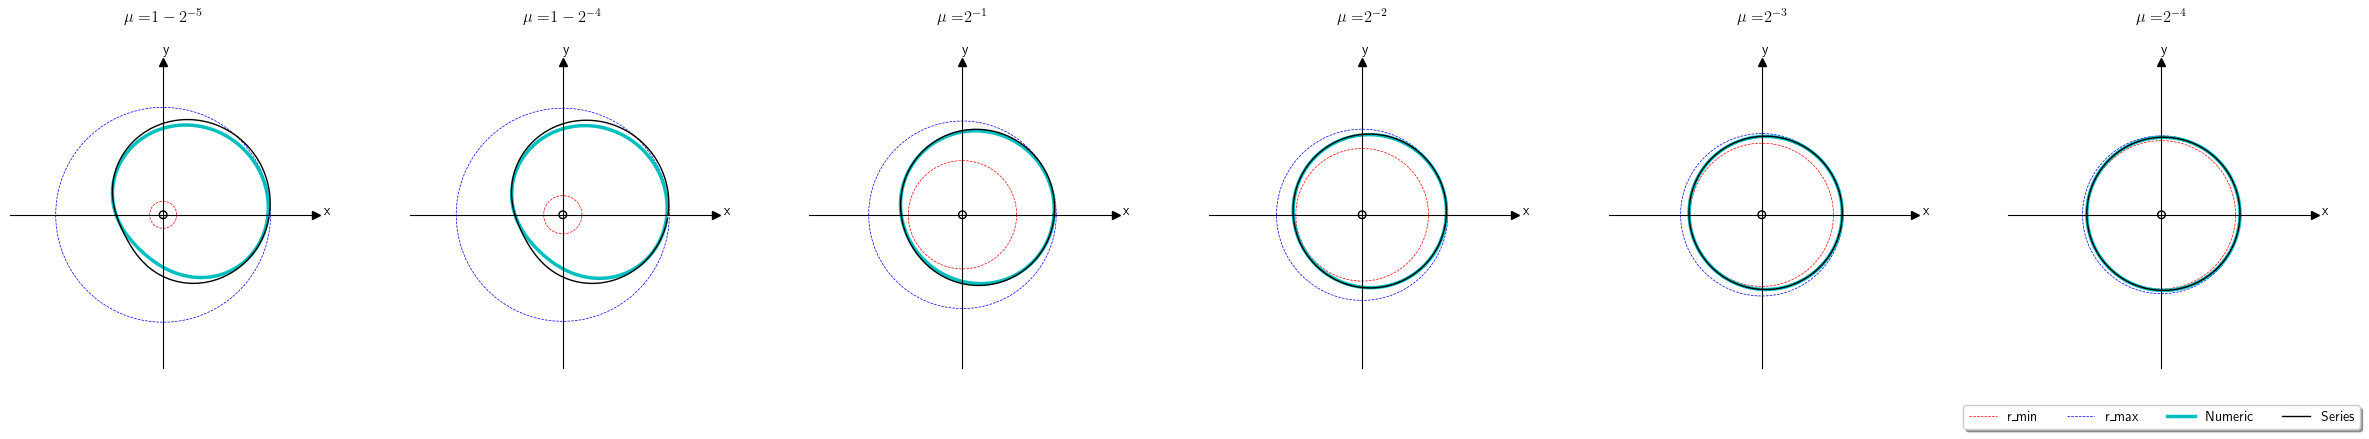

In [4]:
def rdot(theta, r, mu):
    return r*(1 - r**2) + mu*r*np.cos(theta)

def r_series(theta, mu):
    return 1 + mu*(2/5*np.cos(theta) + 1/5*np.sin(theta))

def numerical_orbit(mu, T=200*np.pi):
    sol = solve_ivp(rdot, [0, T], [1.0], args=(mu,), max_step=0.05, rtol=1e-9, atol=1e-9)
    mask = sol.t > (T - 2*np.pi)
    theta = sol.t[mask]
    r = sol.y[0][mask]
    theta -= theta[0]
    return theta, r

mus = [1-2**(-5),1-2**(-4), 2**(-1), 2**(-2), 2**(-3), 2**(-4)]
muZ = ['$1-2^{-5}$','$1-2^{-4}$', '$2^{-1}$', '$2^{-2}$', '$2^{-3}$', '$2^{-4}$']
fig, axes = plt.subplots(1,6, figsize=(24, 5))
axes = axes.flatten()
for ax, mu, mZ in zip(axes, mus, muZ):
    theta, r_num = numerical_orbit(mu)
    r_app = r_series(theta, mu)
    x_num = r_num*np.cos(theta)
    y_num = r_num*np.sin(theta)
    x_app = r_app*np.cos(theta)
    y_app = r_app*np.sin(theta)
    th = np.linspace(0, 2*np.pi, 400)
    r_min = np.sqrt(1 - mu)
    r_max = np.sqrt(1 + mu)
    
    ax.plot(r_min*np.cos(th), r_min*np.sin(th), 'r--', lw=0.51, label='r_min')
    ax.plot(r_max*np.cos(th), r_max*np.sin(th), 'b--', lw=0.51, label='r_max')
    ax.plot(x_num, y_num, 'c', lw=2.5, label='Numeric')
    ax.plot(x_app, y_app, 'k', lw=1, label='Series')
    ax.set_title(rf'$\mu =${mZ}',y=1.1)
    c=plt.Circle((0, 0), 0.05, color='k', fill=False)
    ax.add_artist(c)
    ax.set_aspect('equal')
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(True)
    ax.text(0,2.1,'y')
    ax.text(2.1,0,'x')
    customize_axes(ax)
plt.legend(['r_min','r_max','Numeric','Series'], 
           loc='upper center', bbox_to_anchor=(0.5, -0.1),  fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()

mu		max error
0.12500	2.5427444e-03
0.25000	7.5860073e-03
0.37500	1.7380943e-02
0.50000	2.9612904e-02
0.62500	4.2447407e-02
0.75000	6.8292995e-02
0.87500	1.0075590e-01
0.03125	4.3649923e-04
0.06250	9.7948029e-04
0.09375	1.6789979e-03
0.12500	2.5427444e-03
0.15625	3.5686544e-03
0.18750	4.7527766e-03
0.21875	6.0949658e-03

Quadratic fit:
Error ≈ (1.4980e-01) μ² + (-2.2560e-02) μ + (2.8006e-03)


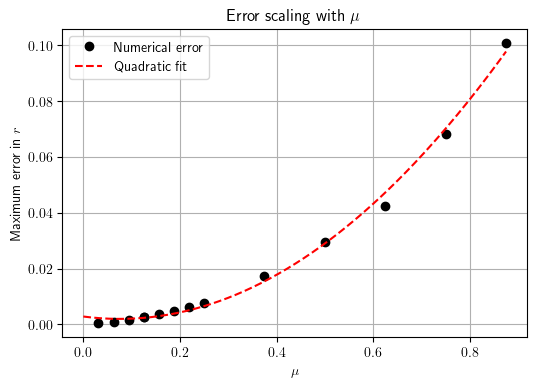

In [5]:
mu_values = np.array([1/8,2/8,3/8,4/8,5/8,6/8,7/8, 1/32, 2/32, 3/32, 4/32, 5/32, 6/32, 7/32])
errors = []

for mu in mu_values:
    theta, r_num = numerical_orbit(mu)
    r_app = r_series(theta, mu)
    max_error = np.max(np.abs(r_num - r_app))
    errors.append(max_error)

errors = np.array(errors)
print("mu\t\tmax error")
for mu, err in zip(mu_values, errors):
    print(f"{mu:.5f}\t{err:.7e}")
 
coeffs = np.polyfit(mu_values, errors, 2)
a, b, c = coeffs
print("\nQuadratic fit:")
print(f"Error ≈ ({a:.4e}) μ² + ({b:.4e}) μ + ({c:.4e})")
mu_plot = np.linspace(0, mu_values.max(), 200)
fit_curve = a*mu_plot**2 + b*mu_plot + c

plt.figure(figsize=(6,4))
plt.plot(mu_values, errors, 'ko', label='Numerical error')
plt.plot(mu_plot, fit_curve, 'r--', label='Quadratic fit')
plt.xlabel(r'$\mu$')
plt.ylabel('Maximum error in $r$')
plt.title('Error scaling with $\mu$')
plt.legend()
plt.grid(True)
plt.show()

<span style="color:red">**EXAMPLE 7.3.2** :                                                                                                                   
In the fundamental biochemical process called glycolysis, living cells obtain energy by breaking down sugar.                                                    
In intact yeast cells as well as in yeast or muscle extracts, glycolysis can proceed in an oscillatory fashion,                                              
with the concentrations of various intermediates waxing and waning with a period of several minutes.                                                                                           
For reviews, see Chance et al. (1973) or Goldbeter (1980).                                                                                                        
A simple model of these oscillations has been proposed by Sel’kov (1968).                                                                                      
In dimensionless form, the equations are                                                                                                                           
$\qquad\begin{aligned} 
\dot{x}&=-x + ay + x^2y \\
\dot{y}&=\;\;\;b-ay-x^2y  
\end{aligned}$                                                                                                                                             
where $x$ and $y$ are the concentrations of ADP (adenosine diphosphate) and F6P (fructose-6-phosphate), and $a,b > 0$ are kinetic parameters.                     
Construct a trapping region for this system.<span>

### **System**
$\qquad\begin{aligned} 
\dot{x}&=-x + ay + x^2y \\
\dot{y}&=\;\;\;b-ay-x^2y  
\end{aligned}$ 

#### Fixed points $(x^*,y^*)$

Fixed points satisfy

$\qquad\dot x = 0, \qquad \dot y = 0.$

From your equations:

$\qquad\begin{aligned}
\dot x = 0 &\Rightarrow y = \frac{x}{a+x^2}, \\
\dot y = 0 &\Rightarrow y = \frac{b}{a+x^2}.
\end{aligned}$

Equating the two expressions for $y$ :

$\qquad\displaystyle\frac{x}{a+x^2} = \frac{b}{a+x^2}.$

Since $a+x^2 \neq 0$,

$\qquad x = b.$

Substitute back to get $y$ :

$\qquad\displaystyle y = \frac{b}{a+b^2}.$

 Fixed point

$\qquad\displaystyle\boxed{(x^*,y^*) = \left(b, \frac{b}{a+b^2}\right)}$

#### Jacobian matrix for the System

$\qquad\begin{aligned}
\dot{x} &= -x + ay + x^2 y, \\
\dot{y} &= b - ay - x^2 y.
\end{aligned}$


#### Jacobian
$\qquad\displaystyle J(x,y) =\begin{pmatrix} \frac{\partial \dot x}{\partial x} & \frac{\partial \dot x}{\partial y} \\ \frac{\partial \dot y}{\partial x} & \frac{\partial \dot y}{\partial y} \end{pmatrix} = \begin{pmatrix} -1 + 2xy & a + x^2 \\ -2xy & -(a + x^2) \end{pmatrix}.$

#### Jacobian evaluated at the fixed point

At

$\qquad \displaystyle x^* = b, \qquad y^* = \frac{b}{a+b^2},$

we have

$\qquad \displaystyle 2x^*y^* = \frac{2b^2}{a+b^2}.$

So

$\qquad J^* = \begin{pmatrix} -1 + \dfrac{2b^2}{a+b^2} & a+b^2 \\ -\dfrac{2b^2}{a+b^2} & -(a+b^2) \end{pmatrix}.$

####  Determinant

Often needed for stability classification:

$\qquad\begin{aligned}
\det(J^*)
&= (-1 + 2xy)(-(a+x^2)) - (a+x^2)(-2xy) = a + x^2.
\end{aligned}$


Evaluated at the fixed point:

$\qquad\boxed{\det(J^*) = a + b^2 > 0}$


#### Trace of the Jacobian

$\qquad\begin{aligned}
\operatorname{tr}(J^*)
&= \left(-1 + \frac{2b^2}{a+b^2}\right) - (a+b^2) \\
&= \frac{b^2 - a}{a+b^2} - (a+b^2) \\
&= \frac{b^2 - a - (a+b^2)^2}{a+b^2} \\
&= -\frac{b^4 + (2a+1)b^2 +(a+a^2)}{a+b^2}.
\end{aligned}$


Or, combined into a single fraction:

$\qquad\boxed{\operatorname{tr}(J^*)= -\frac{b^4 + (2a+1)b^2 +(a+a^2)}{a+b^2}}$

**Stability of the fixed point**

Since $\det A>0$ :

* $\tau>0$ → unstable node or spiral (repeller)
* $\tau<0$ → stable node or spiral (attractor)

Thus the fixed point is **unstable when**

$\qquad b^4+(2a-1)b^2+(a+a^2)<0.$

**Dividing line $\tau=0$**

Set the numerator equal to zero :

$\qquad b^4+(2a-1)b^2+(a+a^2)=0.$

This is a quadratic in $b^2$ :

$\qquad (b^2)^2+(2a-1)b^2+(a+a^2)=0.$

Solving,

$\qquad\boxed{b^2=\frac12\Bigl(1-2a\pm\sqrt{1-8a}\Bigr)}$

This curve divides parameter space into :

* **unstable fixed point** ($\tau>0$)
* **stable fixed point** ($\tau<0$)

Real solutions require

$\qquad\boxed{a\le \tfrac18.}$


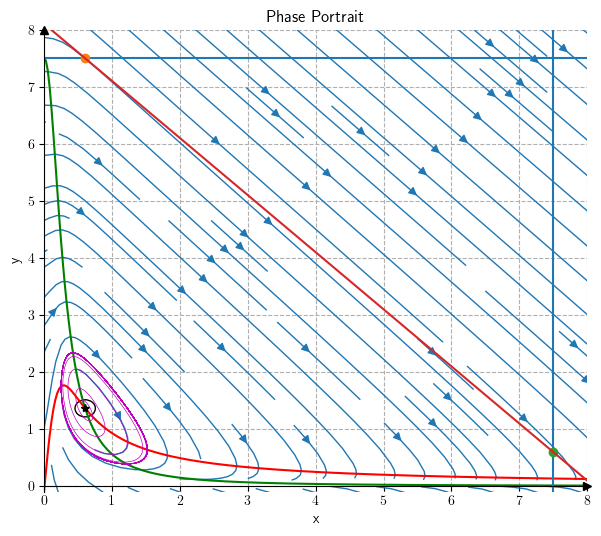

In [6]:
def f(X, const):
    a,b = const
    x,y = X
    dx = -x+a*y+x**2*y
    dy =  b-a*y-x**2*y
    return dx, dy

def F(t, X, a, b):
    const = a,b
    return f(X, const)
    
a, b = 0.08,0.6
t_span = (0, 300)
sol = solve_ivp(F,t_span,[0.55,1.5],args=(a,b,),max_step=0.05,rtol=1e-8,atol=1e-10)

x = np.linspace(-1, 10, 400)
y = np.linspace(-1, 10, 400)
X, Y = np.meshgrid(x, y)
U, V = f((X, Y), (a, b))

fig,ax=plt.subplots(figsize=(7, 6))
ax.streamplot(X, Y, U, V, density=1.2, linewidth=1, arrowsize=1.2)
ax.plot(x, x / (a + x**2), 'r', label=r'$\dot{x}=0$')
ax.plot(x, b / (a + x**2), 'g', label=r'$\dot{y}=0$')
ax.plot(b, b/(a+b**2), 'k*', label='Fixed point at $({0}, {1})$'.format(b,np.round(b/(a+b**2),2)))
c=plt.Circle((b, b/(a+b**2)), 0.15, color='k', fill=False)
ax.add_artist(c)
ax.axhline(y=b/a)
ax.plot(b,b/a,'o')
ax.axvline(b/a)
ax.plot(b/a,b,'o')
ax.plot(x,-x+b+b/a, '-')
ax.plot(sol.y[0], sol.y[1], 'm', lw=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Phase Portrait")
ax.set_xlim(0, 8)
ax.set_ylim(-0.1, 8)
ax.grid(linestyle='--')
customize_axes(ax)
plt.show()

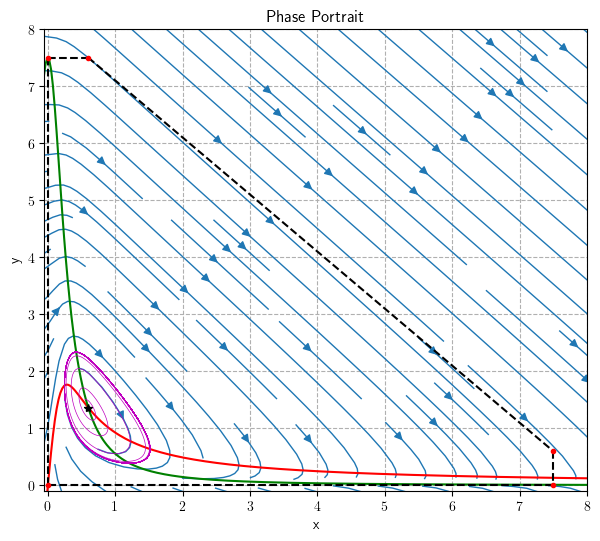

In [7]:
def L_function(t, Q):
    edge_points_list = []
    t = t.reshape(-1, 1)
    for i in range(len(Q)):
        edge_points = Q[i] + t * (Q[(i+1) % len(Q)] - Q[i])
        edge_points_list.append(edge_points)
    return np.array(edge_points_list)

a = 0.08
b = 0.6
Q = np.array([[0, b/a], [b, b/a], [b/a, b], [b/a, 0], [0,0]])
t = np.linspace(0, 1, 1000)
L = L_function(t,Q)
vertex_names = ['A', 'B', 'C', 'D']

fig,ax=plt.subplots(figsize=(7, 6))
ax.streamplot(X, Y, U, V, density=1.2, linewidth=1, arrowsize=1.2)
ax.plot(x, x / (a + x**2), 'r', label=r'$\dot{x}=0$')
ax.plot(x, b / (a + x**2), 'g', label=r'$\dot{y}=0$')
ax.plot(b, b/(a+b**2), 'k*', label='Fixed point at $({0}, {1})$'.format(b,np.round(b/(a+b**2),2)))

for edge_points in L:
    plt.plot(edge_points[:, 0], edge_points[:, 1], 'k--')
for edge_points in Q:
    plt.plot(edge_points[ 0], edge_points[ 1], 'r.')

ax.plot(sol.y[0], sol.y[1], 'm', lw=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Phase Portrait")
ax.set_xlim(-0.05, 8)
ax.set_ylim(-0.1, 8)
ax.grid(linestyle='--')
plt.show()

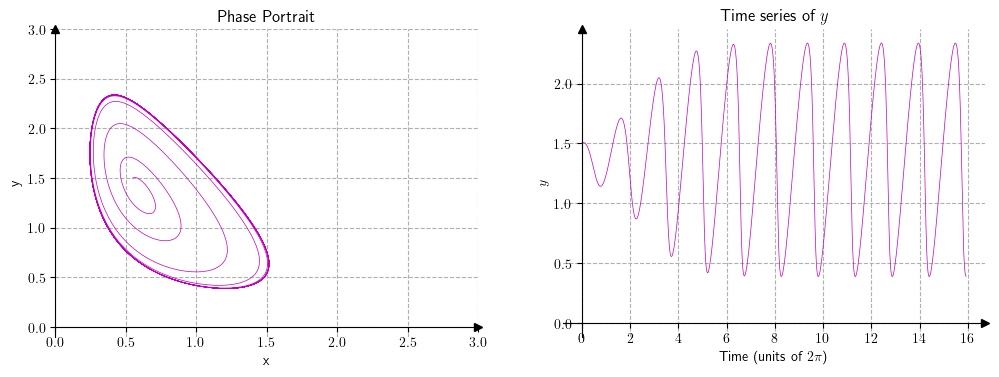

In [8]:
t = (0, 100)
sol = solve_ivp(F, t, [0.55, 1.5], args=(a, b), max_step=0.05, rtol=1e-8, atol=1e-10)
t_scaled = sol.t / (2 * np.pi)

fig, ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(sol.y[0], sol.y[1], 'm', lw=0.5)
ax[0].set_xlim(0, 3)
ax[0].set_ylim(-0.1, 3)
ax[0].grid(linestyle='--')
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Phase Portrait")
customize_axes(ax[0])
ax[1].plot(t_scaled, sol.y[1], 'm', lw=0.5)
ax[1].set_xlabel('Time (units of $2\pi$)')
ax[1].set_ylabel('$y$')
ax[1].set_title('Time series of $y$')
ax[1].grid(linestyle='--')
customize_axes(ax[1])
plt.show()

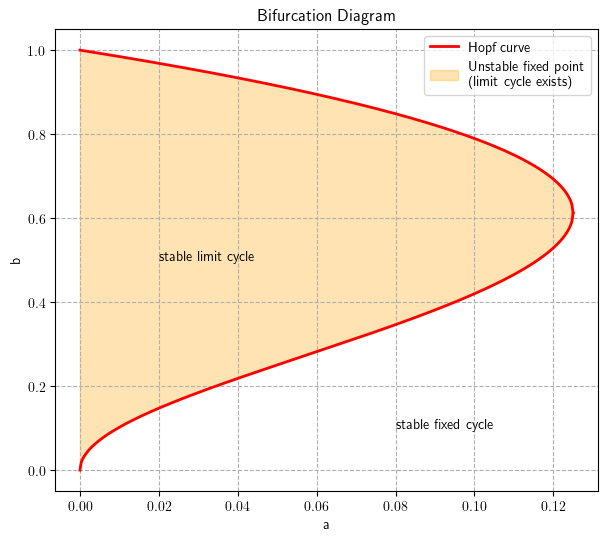

In [9]:
a_vals = np.linspace(0, 0.125, 400)
disc = np.sqrt(1 - 8*a_vals)

b1 = np.sqrt(0.5*(1 - 2*a_vals + disc))
b2 = np.sqrt(0.5*(1 - 2*a_vals - disc))

plt.figure(figsize=(7,6))
plt.plot(a_vals, b1, 'r', lw=2, label="Hopf curve")
plt.plot(a_vals, b2, 'r', lw=2)
plt.fill_between(a_vals, b2, b1, color='orange', alpha=0.3,
                 label="Unstable fixed point\n(limit cycle exists)")

plt.xlabel("a")
plt.ylabel("b")
plt.title("Bifurcation Diagram")
plt.text(0.02, 0.5,'stable limit cycle')
plt.text(0.08, 0.1,'stable fixed cycle')
plt.legend()
plt.grid(linestyle='--')
plt.show()


#### Reference :

1. Sel’kov, E. E. (1968). *Self-oscillations in glycolysis. **A simple kinetic model**.* Eur. 
J. Biochem. 4, 79.

<span style="color:red">**8.3.1 (Brusselator)**                                                                                                                    
The Brusselator is a simple model of a hypothetical chemical oscillator, named after the home of the scientists who proposed it.                                                                                      
*(This is a common joke played by the chemical oscillator community; there is also the **Oregonator**, **Palo Altonator**, etc.)*                                                                                       
In dimensionless form, its kinetics are                                                                                                                                                                            
$\qquad\qquad\begin{aligned}\dot x &= 1-(b+1)x + ax^2y, \\ \dot y &= bx - ax^2 y .\end{aligned}$                                                                                                                                                                            
where $a,b>0$ are parameters and $x,y\ge 0$ are dimensionless concentrations.                                                                                      
**(a)** Find all the fixed points, and use the Jacobian to classify them.                                                                                      
**(b)** Sketch the nullclines, and thereby construct a trapping region for the flow.                                                                                      
**(c)** Show that a Hopf bifurcation occurs at some parameter value $b=b_c$, where $b_c$ is to be determined.                                                                                      
**(d)** Does the limit cycle exist for $b>b_c \;\;$ or   $\;\; b<b_c$ ? Explain, using the Poincaré–Bendixson theorem.                                                                                      
**(e)** Find the approximate period of the limit cycle for $b\approx b_c$.


## System (Brusselator)

$\qquad\qquad\begin{aligned} \dot x &= 1-(b+1)x + ax^2y, \\ \dot y &= bx - ax^2 y , \end{aligned} \qquad a,b>0,; x,y\ge0 $

### (a) Fixed points and their classification

**Find fixed points**

Set $\dot x=\dot y=0$.

$\qquad\qquad \begin{aligned} 0 &= 1-(b+1)x + ax^2y \quad\Rightarrow\quad (b+1)x =1 + ax^2y, \\ 0 &= bx - ax^2 y \qquad\qquad\quad\Rightarrow\quad\;\; ax^2 y =bx , \end{aligned}$

From $\dot y=0$ :

$\qquad\qquad bx=ax^2y \quad\Rightarrow\quad y=\frac{b}{ax}.$

Substitute into $\dot x=0$ :

$\qquad\qquad 0=1-(b+1)x+a x^2\frac{b}{ax}
=1-(b+1)x+bx
=1-x.$

Thus

$\qquad\qquad\boxed{x^*=1},\qquad \boxed{y^*=\dfrac{b}{a}}.$

This is the **unique fixed point**.

**Jacobian matrix**

$\qquad\qquad J(x,y)= \begin{pmatrix} -(b+1)+2axy & ax^2 \\ b-2axy & -ax^2 \end{pmatrix}$

Evaluate at $(1,b/a)$ :

$\qquad\qquad J^*= \begin{pmatrix} b-1 & a \\ -b & -a \end{pmatrix}$

**Trace and determinant**

$\qquad\qquad\operatorname{tr}J^* = b-1-a\;\;, \qquad \det J^* = a > 0$

* Stability depends on the **trace**.
* Since $\det J^*>0$, eigenvalues have the same sign of real part.

**Classification**

* $b<1+a$: stable fixed point
* $b>1+a$: unstable fixed point

### (b) Nullclines and trapping region

**Nullclines**

* $x$-nullcline $\dot x=0$ : $ y=\frac{(b+1)x-1}{ax^2}$

* $y$-nullcline $\dot y=0$ : $ y=\frac{b}{ax}$

These curves intersect at $(1,b/a)$

**Trapping region**

Finding a trapping region implies that we’re looking for a limit cycle and $ b > 1 + a$ for an unstable fixed point.                                           
A trapezoid with a circle around the fixed point will suffice.

First, we should make sure that the fixed point is always inside the trapezoid.                                                                             
This is actually very easy with the choice of trapezoid.

$\qquad\qquad\begin{aligned}   &{x:\quad \frac{1}{b+1} < 1 < 2 - \frac{1}{b+1}}\;\;, \\ &{y:\quad 0 < \frac{b}{a} < \frac{b(b+1)}{a}}. \end{aligned} $

Next, to confirm that the vector field points inward on the trapezoid edges,                                                                                
we’ll have to check that the vector field points inward on all the edges  (starting with the vertical edge and going clockwise).


**Vertical edge** $ x=\dfrac{1}{b+1}$, outward normal $ (1,0)$ :

$\qquad\qquad \langle 1,0\rangle\cdot\langle\dot x,\dot y\rangle\Big|_{x=\frac{1}{b+1}}
= 1-(b+1)\frac{1}{b+1}+a\left(\frac{1}{b+1}\right)^2y
= \frac{ay}{(b+1)^2} > 0.$

**Top edge** $ y=\dfrac{b(b+1)}{a}$, outward normal $ (0,-1)$ :

$\qquad\qquad \langle0,-1\rangle\cdot\langle\dot x,\dot y\rangle\Big|_{y=\frac{b(b+1)}{a}}
= bx-ax^2\frac{b(b+1)}{a}
= bx\bigl(x(b+1)-1\bigr) > 0.$

**Slanted edge** $y = 2 - x - \frac{1}{b+1} + \frac{b(b+1)}{a},
\qquad x > \frac{1}{b+1},$ outward normal $ (-1,-1) $ :

$\qquad\qquad \langle -1,-1\rangle\cdot\langle\dot x,\dot y\rangle
= 1-(b+1)x+ax^2y-(bx-ax^2y)
= -1+x > 0.$

**Bottom edge** $y=0$, outward normal $(0,1)$ :

$\qquad\qquad \langle 0,1\rangle\cdot\langle\dot x,\dot y\rangle\Big|_{y=0}
= bx-ax^2(0)
= bx > 0.$

Lastly, since the linearization predicts an unstable fixed point,                                                                                        
we can always draw a sufficiently small circle enclosing the fixed point with the vector field pointing outward.                                               
Therefore we have our trapping region.

### (c) Hopf bifurcation

A Hopf bifurcation occurs when :

$\qquad\qquad\operatorname{tr}J^*=0, \qquad \det J^*>0.$

Set

$\qquad\qquad b-1-a=0 \quad\Rightarrow\quad \boxed{b_c=1+a}.$

At $b=b_c \;\;$ , let, $\;\; b = 1 + a + \mu, \qquad 0 < \mu \ll 1 .$

Then the Jacobian matrix at the fixed point $(x^*,y^*)=(1,b/a)$ is

$\qquad\qquad A =\begin{pmatrix} b-1 & a \\ -b & -a \end{pmatrix}=\begin{pmatrix} a+\mu & a \\ -(1+a+\mu) & -a \end{pmatrix}.$

The eigenvalues of $A$ are

$\qquad\qquad\lambda_{1,2}= \frac{\mu \pm \sqrt{\mu^2 - 4a}}{2} \approx \pm i\sqrt{a}\;\;,$ since $0<\mu\ll1$

Thus,                                            
$\qquad\qquad\lambda=\pm i\sqrt{a}\;\;$,

so eigenvalues cross the imaginary axis transversely. Thus, the sign of the trace changes and there are no
other fixed points.

### (d) Existence of the limit cycle

* For $b>b_c$, the fixed point is **unstable**.
* A trapping region exists and contains no other fixed points.
* By the **Poincaré–Bendixson theorem**, trajectories must approach a **limit cycle**.

$\qquad\qquad\boxed{\text{The limit cycle exists for } b>b_c.}$

### (e) Approximate period near the Hopf point

At $b=b_c$, eigenvalues are

$\qquad\qquad\lambda=\pm i\omega\;\; , \qquad \omega=\sqrt{a}.$

Hence the linearized oscillation period is

$\qquad\qquad\boxed{T\approx\frac{2\pi}{\sqrt{a}}} \quad\text{for } b\approx b_c.$

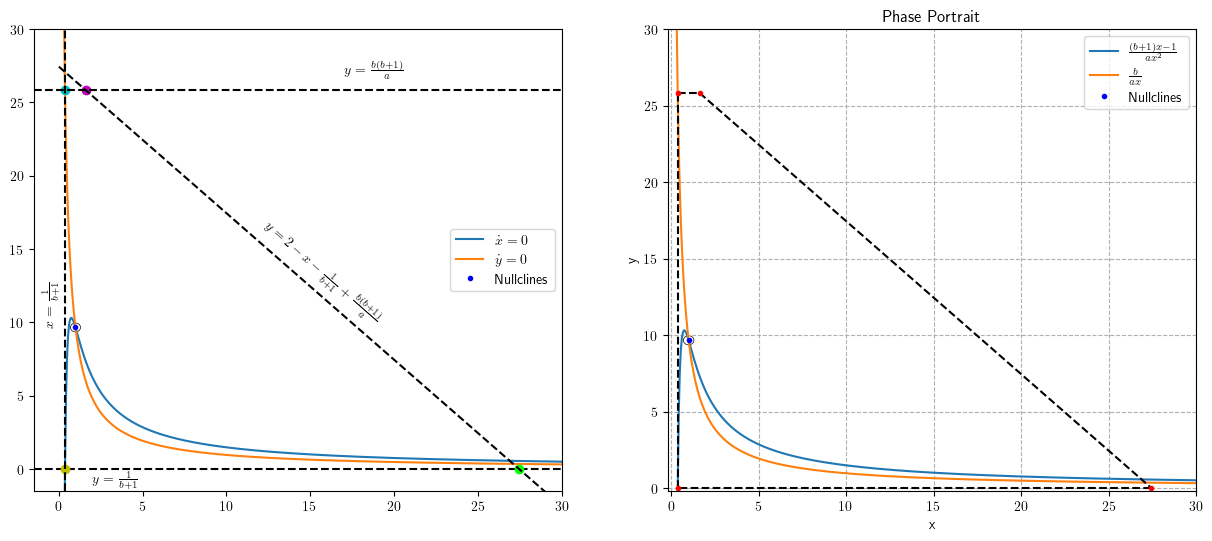

In [10]:
mu = 0.5
a = 0.1732
b = 1 + a + mu
x = np.linspace(0.01, 30, 500)

fig,ax=plt.subplots(1,2,figsize=(15, 6))

ax[0].plot(x, ((b+1)*x - 1)/(a*x**2), lw=1.5, label=r'$\dot x=0$')
ax[0].plot(x, b/(a*x),  lw=1.5, label=r'$\dot y=0$')
ax[0].plot(1, b/a, 'b.', label='Nullclines')
c=plt.Circle((1, b/a), 0.3, color='k',lw=0.5, fill=False)
ax[0].add_artist(c)
ax[0].axhline(y=0,color="black", linestyle='--')
ax[0].plot(2+b*(b+1)/a-1/(b+1), 0, color='lime',marker='o')
ax[0].plot(1/(b+1),0, 'yo')
ax[0].plot(1/(b+1),(b+1)*b/a, 'co')
ax[0].text(2,-1 ,r"$y=\frac{1}{b+1}$",rotation=np.degrees(np.arcsin(0)))
ax[0].plot(2-1/(b+1),(b+1)*b/a,'mo')
ax[0].axhline((b+1)*b/a,color="black", linestyle='--')
ax[0].text(17,27 ,r"$y=\frac{b(b+1)}{a}$",rotation=np.degrees(np.arcsin(0)))
ax[0].axvline(1/(b+1),color="black", linestyle='--')
ax[0].text(-1,10 ,r"$x=\frac{1}{b+1}$",rotation=np.degrees(np.arcsin(1)))
ax[0].plot(x,-x + 2 - (1/(b+1)) + (b+1)*b/a , 'k--')
ax[0].text(12,10 ,r"$y=2-x-\frac{1}{b+1}+\frac{b(b+1)}{a}$",rotation=np.degrees(np.arctan(-0.88)))
ax[0].set_ylim(-1.5, 30)
ax[0].set_xlim(-1.5, 30)
ax[0].legend()

Q = np.array([[1/(b+1),(b+1)*b/a], [2-1/(b+1),(b+1)*b/a], [2+b*(b+1)/a-1/(b+1), 0], [1/(b+1),0]])
t = np.linspace(0, 1, 1000)
L = L_function(t,Q)
vertex_names = ['A', 'B', 'C', 'D']

ax[1].plot(x, ((b+1)*x-1)/(a*x**2), label=r"$\frac{(b+1)x-1}{ax^2}$")
ax[1].plot(x,b/(a*x), label=r"$\frac{b}{ax}$")
ax[1].plot(1,b/a,'b.',label='Nullclines')
c=plt.Circle((1, b/a), 0.3, color='k',lw=0.5, fill=False)
ax[1].add_artist(c)

for edge_points in L:
    ax[1].plot(edge_points[:, 0], edge_points[:, 1], 'k--')
for edge_points in Q:
    ax[1].plot(edge_points[ 0], edge_points[ 1], 'r.')

ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Phase Portrait")
ax[1].set_xlim(-0.2, 30)
ax[1].set_ylim(-0.2, 30)
ax[1].grid(linestyle='--')
ax[1].legend()
plt.show()

<span style="color:red">**8.3.2**  Schnackenberg (1979) considered the following hypothetical model of a chemical oscillator :                                                                                                  
$\qquad\qquad\displaystyle\begin{aligned} X &\;\xrightleftharpoons[k_{-1}]{k_{1}}\; A\, , \\ B &\;\xrightarrow{k_2}\; Y \, , \\ 2X + Y &\;\xrightarrow{k_3}\; 3X . \end{aligned}$                                                                                                                                                                                                    
After using the Law of Mass Action and nondimensionalizing, Schnackenberg reduced the system to                                                                                                  
$\qquad\qquad\begin{aligned} \dot x &= a - x + x^2 y, \\ \dot y &= b - x^2 y . \end{aligned}$                                                                                                  
where $a,b>0$ are parameters and $x,y>0$ are dimensionless concentrations.                                                                                                  
**(a)** Show that all trajectories eventually enter a certain trapping region, to be determined.                                                             
Make the trapping region as small as possible.                                                                                                                
*(Hint: Examine the ratio $\dot y / \dot x$ for large $x$.)*                                                                                                  
**(b)** Show that the system has a unique fixed point, and classify it.                                                                                  
**(c)** Show that the system undergoes a Hopf bifurcation when   $\quad b - a = (a + b)^3.$                                                                                                                                                                    
**(d)** Is the Hopf bifurcation subcritical or supercritical ? Use a computer to decide.                                                                                  
**(e)** Plot the stability diagram in the $(a,b)$-plane.                                                                                                       
*(Hint: It is a bit confusing to plot the curve $b - a = (a + b)^3$, since this requires analyzing a cubic.                                                                                   
As in Section 3.7, the parametric form of the bifurcation curve comes to the rescue.                                                                                   
Show that the bifurcation curve can be expressed as*                                                                                                                                                                    
$\qquad\qquad\begin{aligned} a &= \frac12 x^* \left(1 - (x^*)^2\right)\,\, , \\
b &= \frac12 x^* \left(1 + (x^*)^2\right)\,\, . \end{aligned}$                                                                                                                                                                    
*where $x^* > 0$ is the $x$-coordinate of the fixed point.                                                                                                        
Then plot the bifurcation curve from these parametric equations.                                                                                                    
This trick is discussed in **Murray (2002)**   )* <span>

**System**

$\qquad\qquad\displaystyle\begin{aligned} \dot{x} &= a - x + x^2 y, \\ \dot{y} &= b - x^2 y. \end{aligned}$

where $a, b > 0$ are parameters and $x, y > 0$ are dimensionless concentrations.

We are tasked with analyzing this system, following the steps in the problem statement.


### **(a) Trapping Region**

We need to show that all trajectories eventually enter a certain trapping region. The goal is to make the trapping region as small as possible.

**Examine the ratio $\displaystyle\left(\frac{\dot{y}}{\dot{x}}\right)$ for large $x$**

From the system, we have :

$\qquad\qquad\displaystyle\frac{\dot{y}}{\dot{x}} = \frac{b - x^2 y}{a - x + x^2 y}.$

For large $x$, we expect the term $x^2 y$ to dominate in both equations, so the ratio simplifies to :

$\qquad\qquad\displaystyle\frac{\dot{y}}{\dot{x}} \approx \frac{-x^2 y}{x^2 y} = -1.$

This means that for large $x$, the trajectories will be nearly parallel to the line $y = -x + C$, where $C$ is a constant.

**Trapping region**

To construct the trapping region, we need to ensure that the trajectories are confined to a bounded region.

* The **$x$-nullcline** $\dot{x} = 0$ is given by:
  
  $\qquad \displaystyle a - x + x^2 y = 0 \quad \Rightarrow \quad y = \frac{x-a}{x^2}.$
  
* The **$y$-nullcline** $\dot{y} = 0$ is given by:
  
  $\qquad\displaystyle b - x^2 y = 0 \quad \Rightarrow \quad y = \frac{b}{x^2}.$

The trajectories will be confined within the region bounded by these two nullclines.                                                                        
The intersection of these curves gives the fixed point.                                                                                                  
The trapping region is then the region enclosed by the nullclines and the coordinate axes.


### **(b) Fixed Points and Classification**

**nulliclies**

The fixed points are the values of $x$ and $y$ that satisfy $\dot{x} = 0$ and $\dot{y} = 0$.

From $\dot{x} = 0$ :

$\qquad\displaystyle a - x + x^2 y = 0 \quad \Rightarrow \quad y = \frac{ x-a}{x^2}.$

Substitute this into $\dot{y} = 0$ :

$\qquad\displaystyle b - x^2 y = 0 \qquad\quad \Rightarrow \quad y = \frac{b}{x^2}.$

**fixed points**

Equating the two expressions for $y$ :

$\qquad\qquad\displaystyle\frac{x-a}{x^2} = \frac{b}{x^2}.$

This simplifies to :

$\qquad\qquad\displaystyle x-a = b \quad \Rightarrow \quad x^* = a + b.$

Substitute $x^* = a + b$ into $y = \frac{b}{x^2}$:

$\qquad\qquad\displaystyle y^* = \frac{b}{(a + b)^2}.$

Thus, the fixed point is                                                                                                                                  
$\qquad\qquad\boxed{\displaystyle (x^*, y^*) = \left(a + b, \frac{b}{(a + b)^2}\right)}$.

**Jacobian**

The Jacobian matrix is :

$\qquad\qquad\displaystyle\begin{aligned} J(x, y) &=\begin{pmatrix} \frac{\partial \dot{x}}{\partial x} & \frac{\partial \dot{x}}{\partial y} \\ \frac{\partial \dot{y}}{\partial x} & \frac{\partial \dot{y}}{\partial y} \end{pmatrix}
&=\begin{pmatrix} -1 + 2xy & x^2 \\ -2xy & -x^2 \end{pmatrix}. \end{aligned}$

Thus, the Jacobian at the fixed point $(x^*, y^*) = (a+b, \frac{b}{(a+b)^2})$ is:

$\qquad\qquad\displaystyle J(x^*, y^*) = \begin{pmatrix} -1 + \frac{2b}{a+b} & (a+b)^2 \\ -\frac{2b}{a+b} & -(a+b)^2 \end{pmatrix}.$

**Determinant** 

$\qquad\qquad\begin{aligned} \displaystyle \operatorname{det}(J) &= \left(-1 + 2x^*y^* \right)(-{x^*}^2) - ({x^*}^2)\left(-2x^*y^* \right) \\ &= \left(-1 + \frac{2b}{a+b}\right)(-(a+b)^2) - (a+b)^2\left(-\frac{2b}{a+b}\right)
\\ &= \left(-1 + \frac{2b}{a+b}\right)(-(a+b)^2) +\left(- (a+b)^2\right)\left(-\frac{2b}{a+b}\right) 
\\ &= \left(- (a+b)^2\right) \left(-1 + \frac{2b}{a+b} -\frac{2b}{a+b} \right) \\ &=(a+b)^2. \end{aligned}$

**Trace**

$\qquad\qquad\begin{aligned}\displaystyle \operatorname{tr}(J) &= \left(-1 + 2x^*y^* \right) +(-{x^*}^2) \\ &= -1 + \frac{2b}{a+b} - (a+b)^2 . \end{aligned}$

### **(c) Hopf Bifurcation**

A Hopf bifurcation occurs when

$\qquad\qquad\displaystyle \text{tr}(J)=0,\qquad \det(J)>0.$

We set $\operatorname{tr}(J) = 0$ and solve for $b$.

$\qquad\qquad\displaystyle\operatorname{tr}(J) = 0 $

$\qquad\qquad\displaystyle 0 = -1 + \frac{2b}{a+b} - (a+b)^2 $

$\qquad\qquad\displaystyle 0= \frac{-(a+b)+2b- (a+b)^3}{a+b}=\frac{2b-a-b - (a+b)^3}{a+b}$ 

$\qquad\qquad\displaystyle 0= (b-a)- (a-b)^3$ 

$\qquad\qquad\displaystyle b - a = (a + b)^3.$

This is the bifurcation condition . 

$\qquad\qquad\displaystyle\boxed{ b - a = (a + b)^3}.$

### **(d) Subcritical or Supercritical Bifurcation**

* If $\operatorname{det}(J) > 0$ and $\operatorname{tr}(J) > 0$, then the fixed point is a **repeller**. 
* If $\operatorname{det}(J) > 0$ and $\operatorname{tr}(J) < 0$, the fixed point is a **attractor**.

 * Supercritical Hopf : fixed point loses stability, a small stable limit cycle is born.

 * Subcritical Hopf : fixed point loses stability, an unstable limit cycle collapses onto it (no stable orbit nearby)

### **(e) Stability Diagram**

A Hopf bifurcation occurs when

$\qquad\qquad\displaystyle \text{tr}(J)=0,\qquad \det(J)>0.$

$\qquad\qquad\displaystyle \text{tr}(J)= -1 + 2x^* y^* - (x^*)^2.$

Substitute $y^* = b/(x^*)^2$ :

$\qquad\qquad\displaystyle\text{tr}(J) = -1 + \frac{2b}{x^*} - (x^*)^2.$

Setting $\text{tr}(J)=0$ gives

$\qquad\qquad\displaystyle\frac{2b}{x^*} = 1 + (x^*)^2 \quad\Longrightarrow\quad b = \frac12 x^*\left(1 + (x^*)^2\right).$

Since $x^* = a + b$,

$\qquad\qquad\displaystyle a = x^* - b = x^* - \frac12 x^*\left(1 + (x^*)^2\right) = \frac12 x^*\left(1 - (x^*)^2\right).$

Thus the Hopf bifurcation curve is

$\qquad\qquad\displaystyle\boxed{ \begin{aligned} a &= \frac12 x^*\left(1 - (x^*)^2\right), \\ b &= \frac12 x^*\left(1 + (x^*)^2\right). \end{aligned}\qquad x^*>0 }$

This avoids directly plotting the cubic

$\qquad\qquad\displaystyle b-a=(a+b)^3,$

exactly as noted by **Murray (2002)**.


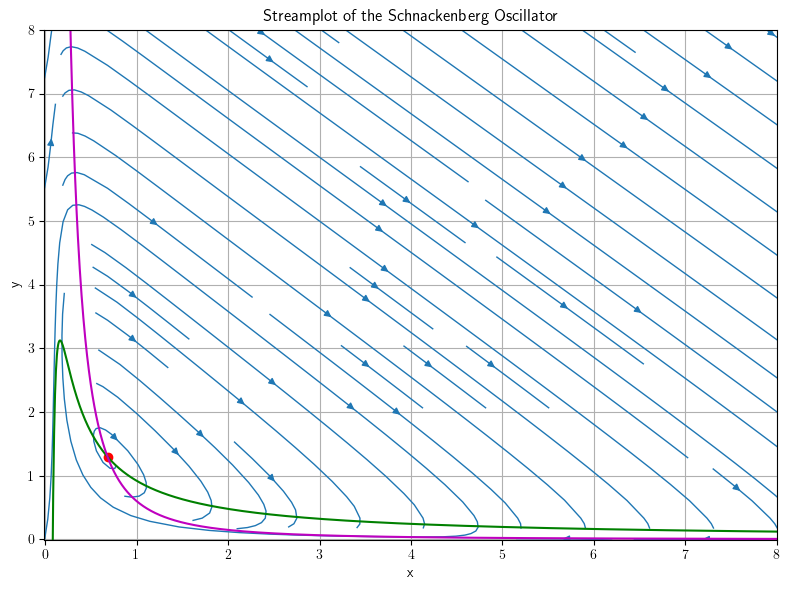

In [16]:
def fix(a,b):
    return a+b, b/(a+b)**2

def f(X, const):
    a,b = const
    x,y = X
    dx = a - x + x**2 * y
    dy = b - x**2 * y
    return dx, dy

def jacobian(X, a, b):
    x, y = X
    return np.array([[-1 + 2*x*y,  x*x],
                     [    -2*x*y, -x*x]])

def F(t, X, a, b):
    const = a,b
    return f(X, const)
    
a = 0.08
b = 0.6

x_vals = np.linspace(-0.01, 10, 2000)
y_vals = np.linspace(-0.01, 10, 2000)
X, Y = np.meshgrid(x_vals, y_vals)
U,V = f((X,Y),(a,b))
xf,yf = fix(a,b)

plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, U, V, linewidth=1)
plt.plot(xf,yf,'ro')
plt.plot(x_vals, (x_vals-a)/x_vals**2, 'g')
plt.plot(x_vals, b/x_vals**2, 'm')
plt.ylim(-0.01,8)
plt.xlim(-0.01,8)
plt.title('Streamplot of the Schnackenberg Oscillator')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.tight_layout()
plt.show()

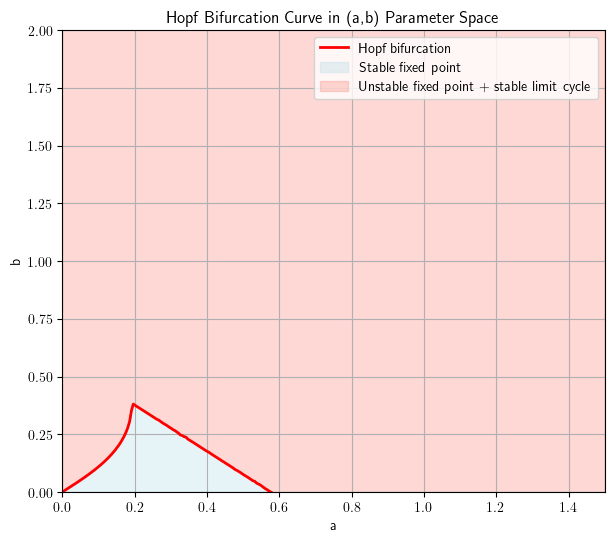

In [17]:
from scipy.optimize import fsolve

def hopf_eq(b, a):
    return (b - a) - (a+b)**3

a_vals = np.linspace( 0.001, 1.5, 300)
b_hopf = []

for a in a_vals:
    b_sol = fsolve(hopf_eq, a+0.001, args=(a))[0]
    b_hopf.append(b_sol)

b_hopf = np.array(b_hopf)

plt.figure(figsize=(7,6))
plt.plot(a_vals, b_hopf, 'r', linewidth=2, label='Hopf bifurcation')
plt.fill_between(a_vals, 0, b_hopf, color='lightblue', alpha=0.3, label='Stable fixed point')
plt.fill_between(a_vals, b_hopf, 2, color='salmon', alpha=0.3, label='Unstable fixed point + stable limit cycle')
plt.xlabel('a')
plt.ylabel('b')
plt.title('Hopf Bifurcation Curve in (a,b) Parameter Space')
plt.legend()
plt.grid(True)
plt.xlim(0,1.5)
plt.ylim(0,2)
plt.show()

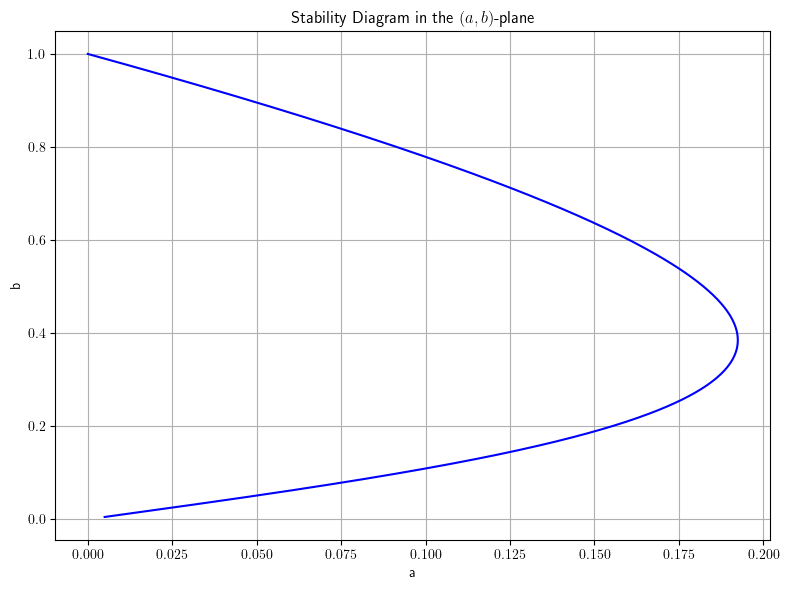

In [18]:
def f(x_star):
    a = 0.5 * x_star * (1 - x_star**2)
    b = 0.5 * x_star * (1 + x_star**2)
    return a, b

x_star_values = np.linspace(0.01, 1, 500)
a_values, b_values = f(x_star_values)

plt.figure(figsize=(8, 6))
plt.plot(a_values, b_values, color='b')
plt.title('Stability Diagram in the $(a, b)$-plane')
plt.xlabel('a')
plt.ylabel('b')
plt.grid(True)
plt.tight_layout()
plt.show()

<span style="color:red"> **8.3.3 (Relaxation limit of a chemical oscillator)**                                                                                                              
Analyze the model for the chlorine dioxide−iodine−malonic acid oscillator,(8.3.4),(8.3.5), in the limit $b\ll 1$.                                                                         
$\qquad\qquad\begin{aligned} \dot{x}&=a-x-\frac{4xy}{1+x^2}\;\;, \\ \dot{y}&=bx \left(1-\frac{y}{1+x^2}\right). \end{aligned}$                                      
Sketch the limit cycle in the phase plane and estimate its period.<span>

**System**

$\qquad\qquad\begin{aligned} \dot{x}&=a-x-\frac{4xy}{1+x^2} \\ \dot{y}&=bx \left(1-\frac{y}{1+x^2}\right). \end{aligned} \qquad \text{ for } a,b>0$                                      
**Nullcline**

$x$-nullcline : $\dot{x}=0$ 

$\qquad\qquad y = \frac{(a-x)(1+x^2)}{4x}$

$y$-nullcline : $\dot{y}=0$

$\qquad\qquad y = 1+x^2$

**Fixed-Points**

The Poincaré–Bendixson theorem, because there is a fixed point inside the box at the intersection of the nullcline

$\qquad\qquad x^*= \frac{a}{5} \;\;, \qquad y^*=1+(x^*)^2 = 1+(\frac{a}{5})^2$

**Jacobian**

$\qquad J(x^*,y^*)  = \begin{pmatrix} \frac{\partial \dot{x}}{\partial x} & \frac{\partial \dot{x}}{\partial y} \\ \frac{\partial \dot{y}}{\partial x} & \frac{\partial \dot{y}}{\partial y} \end{pmatrix}=\begin{pmatrix} -1 - \frac{4y}{1 + x^2} + \frac{8x^2y}{(1 + x^2)^2} & -\frac{4x}{1 + x^2} \\ b \left(1 - \frac{y}{1 + x^2}\right) + \frac{2bxy}{(1 + x^2)^2} & -\frac{bx}{1 + x^2} \end{pmatrix}$

Jacobian at $J$ evaluated at $y^*=1+(x^*)^2$

$\qquad J(x^*,y^*)= \frac{1}{1+(x^*)^2} \begin{pmatrix} 3(x^*)^2-5 & -4x^* \\ 2b(x^*)^2 & -bx^* \end{pmatrix}$

**Determinant**

$\qquad\begin{aligned}
\det J &=\frac{1}{(1+(x^*)^2)^2}\det\begin{pmatrix} 3(x^*)^2-5 & -4x^* \\ 2b(x^*)^2 & -bx^* \end{pmatrix} \\
&=\frac{1}{(1+(x^*)^2)^2} \begin{vmatrix} 3(x^*)^2-5 & -4x^* \\ 2b(x^*)^2 & -bx^* \end{vmatrix} \\
&=\frac{1}{(1+(x^*)^2)^2} \big( 3(x^*)^2-5)(-bx^*)-(-4x^*)(2b(x^*)^2 \big] \\
&=\frac{1}{(1+(x^*)^2)^2} \left(-b x^*(3(x^*)^2-5)+8b(x^*)^3 \right)\\
&=\frac{1}{(1+(x^*)^2)^2} \left(b x^*\bigl[-3(x^*)^2+5+8(x^*)^2\bigr]\right)\\
&=\frac{1}{(1+(x^*)^2)^2} \left(b x^*\bigl(5+5(x^*)^2\bigr)\right)\\
&=\frac{1}{(1+(x^*)^2)^2} 5b x^*\left(1+(x^*)^2\right).
\end{aligned}$

Hence

$\qquad\qquad\boxed{\displaystyle \det J=\frac{5b,x^*}{1+(x^*)^2}>0 }.$


**Trace**

$\qquad\displaystyle\operatorname{tr} J =\frac{1}{1+(x^*)^2}\Bigl[(3(x^*)^2-5)+(-bx^*)\Bigr].$

Therefore

$\qquad\qquad\boxed{\displaystyle\operatorname{tr} J=\frac{3(x^*)^2-5-bx^*}{1+(x^*)^2}}.$

Since $ \det J > 0$, the fixed point is never a saddle.                                                                                                         
Hence, $(x^*, y^*)$ is a **repeller** if $\operatorname{tr} J > 0$, i.e., if

$\qquad\qquad b < b_c \equiv \frac{3a}{5} - \frac{25}{a}. $

When it holds, the **Poincaré–Bendixson theorem** implies the existence of a **closed orbit** somewhere in the **punctured box**.


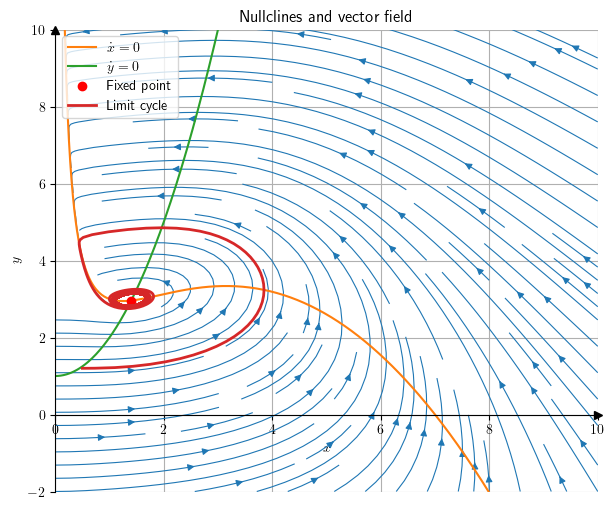

In [14]:
def f(t, z):
    x, y = z
    dx = a - x - (4*x*y) / (1 + x**2)
    dy = b*x * (1 - y / (1 + x**2))
    return [dx, dy]
    
a = 7
b = 0.5

# Grid
x = np.linspace( 0,10, 400)
y = np.linspace(-2,10, 400)
X, Y = np.meshgrid(x, y)

# Vector field
Xd = a - X - (4*X*Y)/(1 + X**2)
Yd = b*X*(1 - Y/(1 + X**2))

# Nullclines
y_x_null = (a - x)*(1 + x**2)/(4*x)     # dx/dt = 0
y_y_null = 1 + x**2                     # dy/dt = 0

# Fixed point
x_star = a/5
y_star = 1 + x_star**2

fig, ax = plt.subplots(figsize=(7,6))

# Vector field (subsampled)
ax.streamplot(X, Y, Xd, Yd, density=1.2, linewidth=0.8, arrowsize=1)

# Nullclines
ax.plot(x, y_x_null, label=r'$\dot{x}=0$')
ax.plot(x, y_y_null, label=r'$\dot{y}=0$')

# Fixed point
ax.plot(x_star, y_star, 'ro', label='Fixed point')

sol = solve_ivp(f, [0, 2000], [0.5, 1.2],max_step=0.1, dense_output=True)
ax.plot(sol.y[0], sol.y[1], lw=2, label='Limit cycle')

customize_axes(ax)
ax.set_xlim(-0.,10)
ax.set_ylim(-2,10)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.set_title('Nullclines and vector field')
ax.grid(True)
plt.show()


Estimated period: 5.824999999994702


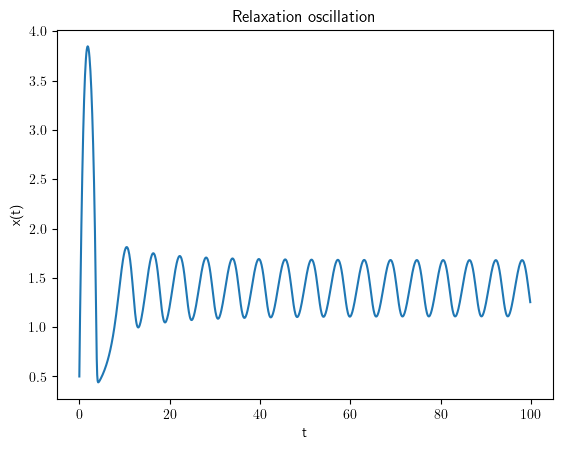

In [15]:
t = sol.t
x = sol.y[0]
peaks = (x[1:-1] > x[:-2]) & (x[1:-1] > x[2:])
peak_times = t[1:-1][peaks]
T_est = np.mean(np.diff(peak_times[-5:]))
print("Estimated period:", T_est)

plt.plot(t[:1000], x[:1000])
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Relaxation oscillation")
plt.show()